Mounted at /content/drive
   Thickness  Bulk_gap  Fermi_energy  Magnetic_impurity  E_transport
0        2.0       0.2           0.0              0.000          0.0
1        2.0       0.2           0.0              0.005          0.0
2        2.0       0.2           0.0              0.010          0.0
3        2.0       0.2           0.0              0.015          0.0
4        2.0       0.2           0.0              0.020          0.0
          Thickness      Bulk_gap  Fermi_energy  Magnetic_impurity  \
count  87649.000000  87649.000000  87649.000000       87649.000000   
mean       3.937113      0.299776      0.049272           0.099960   
std        1.390388      0.060805      0.030229           0.059161   
min        2.000000      0.200000      0.000000           0.000000   
25%        3.000000      0.250000      0.025000           0.050000   
50%        4.000000      0.300000      0.050000           0.100000   
75%        5.000000      0.350000      0.075000           0.150000   


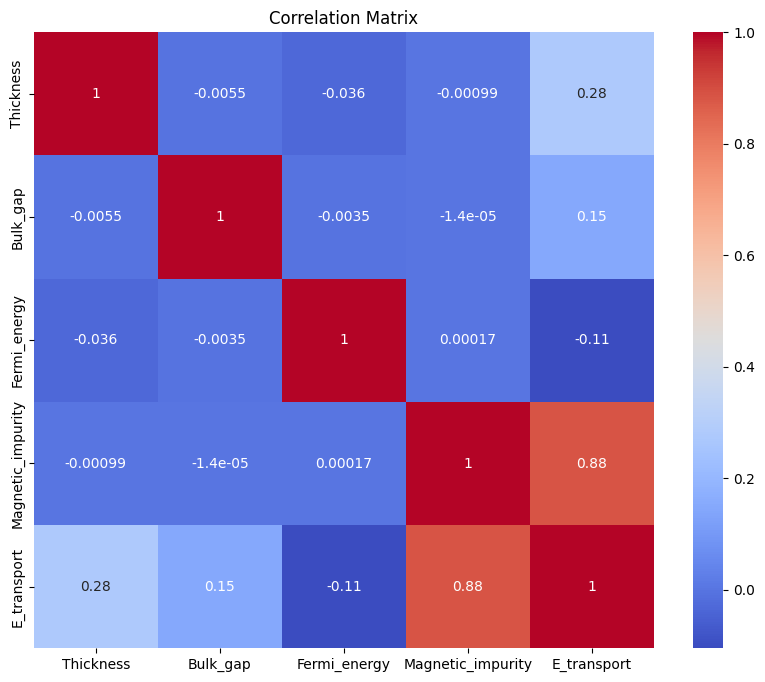

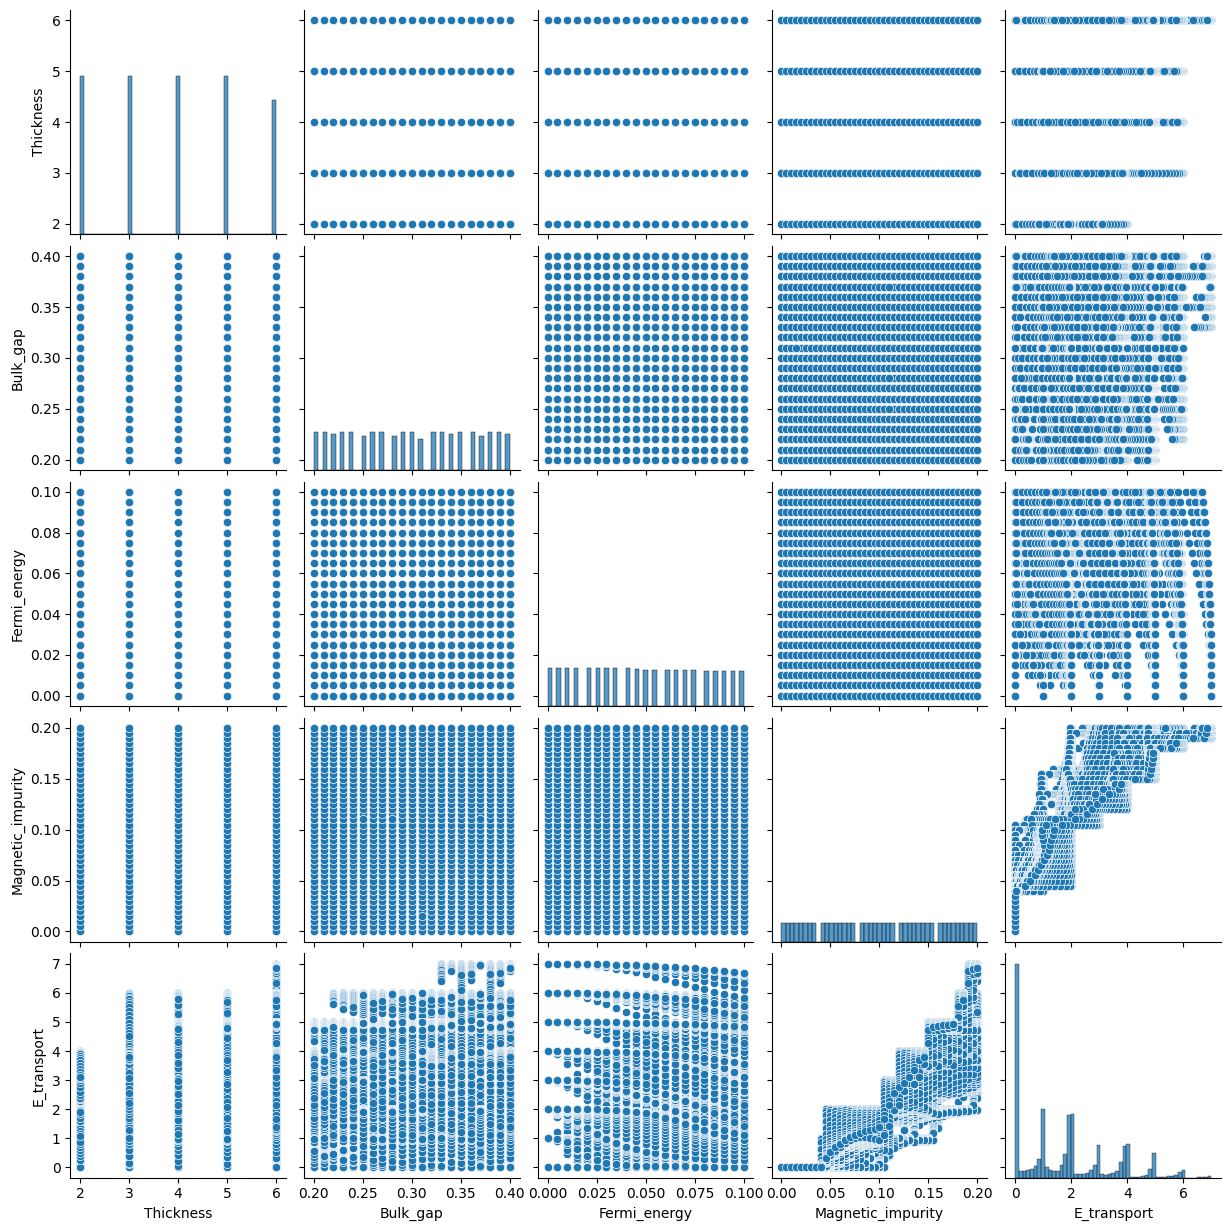

In [1]:
import pandas as pd
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/Final_Data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Summary statistics of the dataset
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Correlation matrix
corr_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Pairplot to visualize relationships
sns.pairplot(data)
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Thickness  Bulk_gap  Fermi_energy  Magnetic_impurity  E_transport
0        2.0       0.2           0.0              0.000          0.0
1        2.0       0.2           0.0              0.005          0.0
2        2.0       0.2           0.0              0.010          0.0
3        2.0       0.2           0.0              0.015          0.0
4        2.0       0.2           0.0              0.020          0.0
          Thickness      Bulk_gap  Fermi_energy  Magnetic_impurity  \
count  87649.000000  87649.000000  87649.000000       87649.000000   
mean       3.937113      0.299776      0.049272           0.099960   
std        1.390388      0.060805      0.030229           0.059161   
min        2.000000      0.200000      0.000000           0.000000   
25%        3.000000      0.250000      0.025000           0.050000   
50%        4.000000      0.300000    

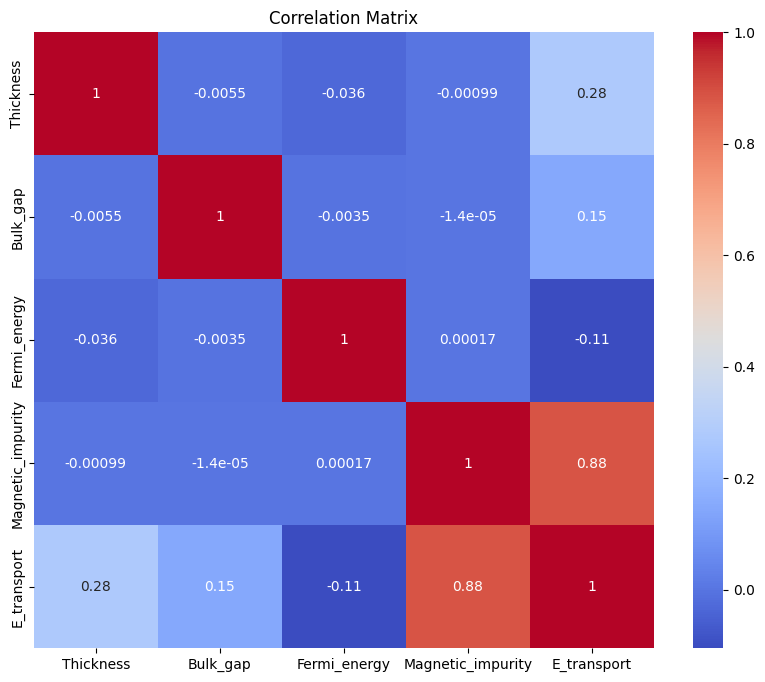

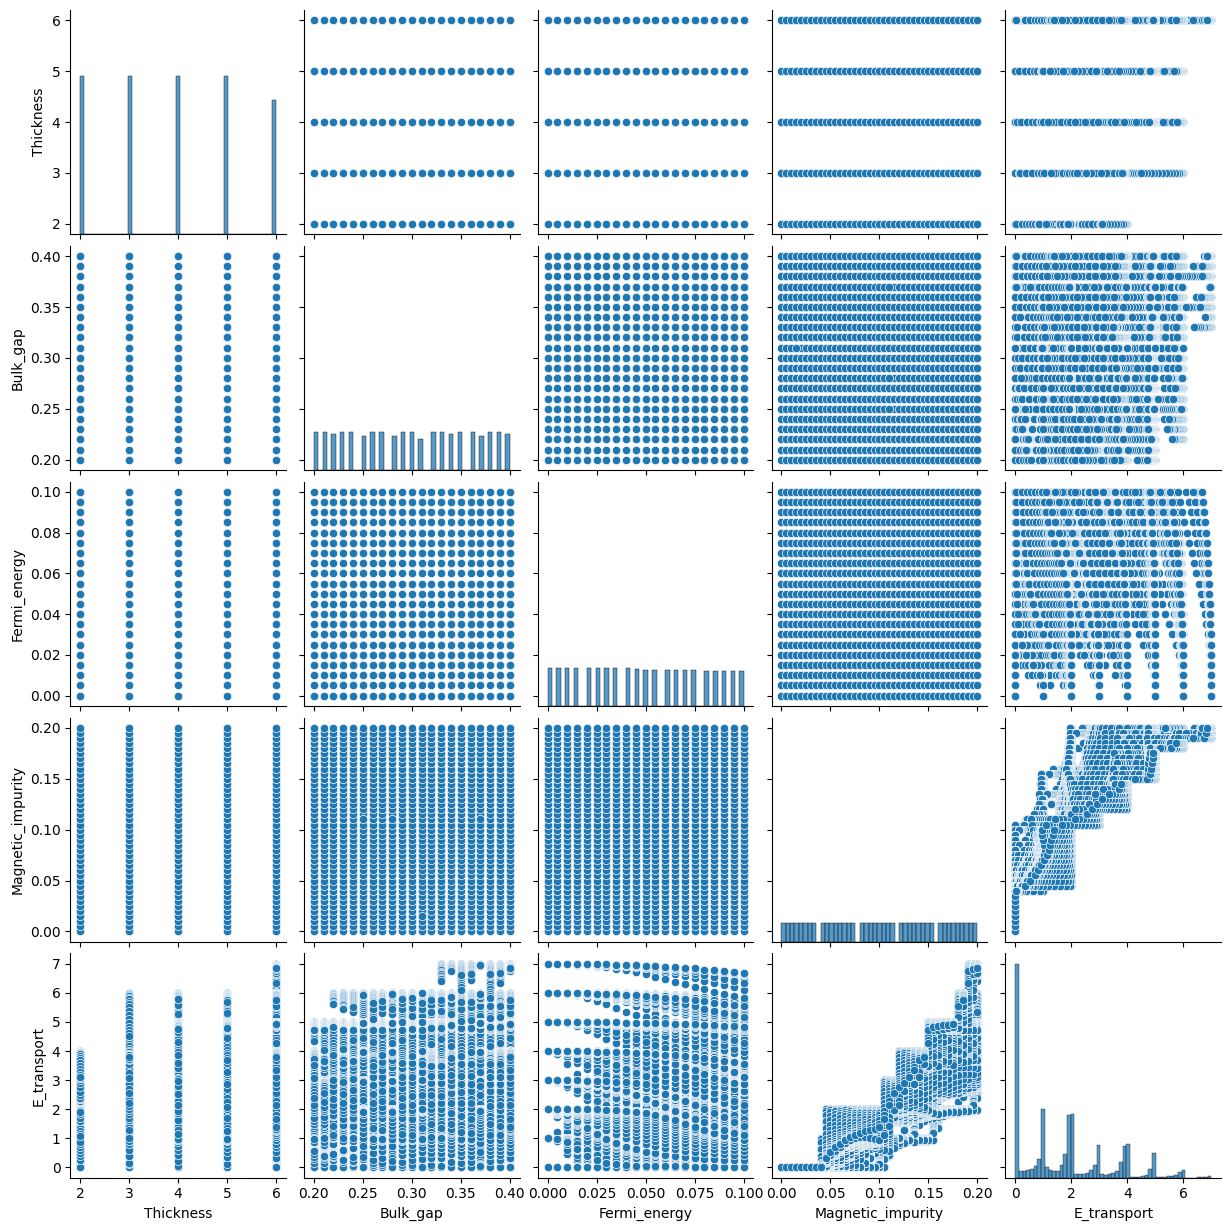

In [2]:
import pandas as pd
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/Final_Data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Summary statistics of the dataset
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Correlation matrix
corr_matrix = data.corr()
print(corr_matrix)

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Pairplot to visualize relationships
sns.pairplot(data)
plt.show()


In [3]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/Final_Data.csv'
data = pd.read_csv(file_path)

# Split the data into features and target
features = data[['Thickness', 'Bulk_gap', 'Fermi_energy', 'Magnetic_impurity']]
target = data['E_transport']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Generate polynomial features and interaction terms
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train the Gradient Boosting Regressor for E_transport
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(gbr_model, X_train_poly, y_train, cv=5, scoring='r2')

print(f"Cross-validated R² scores: {cv_scores}")
print(f"Mean R² score: {cv_scores.mean()}")

# Fit the model on the entire training data
gbr_model.fit(X_train_poly, y_train)

# Predicting E_transport
pred_test = gbr_model.predict(X_test_poly)

# Evaluate the model
def evaluate_model(true_values, predictions, model_name):
    mse = mean_squared_error(true_values, predictions)
    mae = mean_absolute_error(true_values, predictions)
    r2 = r2_score(true_values, predictions)

    print(f"Evaluation Metrics for {model_name}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R²): {r2}")
    print()

evaluate_model(y_test, pred_test, "Gradient Boosting Model (E_transport)")


Cross-validated R² scores: [0.9809037  0.9808201  0.97946083 0.98104903 0.98052317]
Mean R² score: 0.9805513640640114
Evaluation Metrics for Gradient Boosting Model (E_transport):
Mean Squared Error (MSE): 0.05367066491594852
Mean Absolute Error (MAE): 0.16707252661705263
R-squared (R²): 0.9805045883517175



In [9]:
from scipy.optimize import differential_evolution
import numpy as np

# Function to predict E_transport given Thickness, Bulk_gap, Fermi_energy, and Magnetic_impurity
def predict_e_transport(thickness, bulk_gap, fermi_energy, magnetic_impurity):
    inputs = np.array([[thickness, bulk_gap, fermi_energy, magnetic_impurity]])
    inputs_scaled = scaler.transform(inputs)
    inputs_poly = poly.transform(inputs_scaled)
    return gbr_model.predict(inputs_poly)[0]

# Function to minimize (negative E_transport to maximize it)
def objective(params):
    fermi_energy, magnetic_impurity = params
    return -predict_e_transport(thickness, bulk_gap, fermi_energy, magnetic_impurity)

# Bounds for the parameters
bounds = [(0, 0.1), (0, 0.2)]  # Adjust based on realistic bounds in your dataset

# Interactive input for Thickness and Bulk_gap
thickness = float(input("Enter Thickness: "))
bulk_gap = float(input("Enter Bulk_gap: "))

# Optimize using differential evolution
result = differential_evolution(objective, bounds, strategy='best1bin', maxiter=1000, popsize=15, tol=0.01)

# Get the optimal parameters
optimal_fermi_energy, optimal_magnetic_impurity = result.x
max_e_transport = -result.fun

print(f"Optimal Fermi_energy: {optimal_fermi_energy}")
print(f"Optimal Magnetic_impurity: {optimal_magnetic_impurity}")
print(f"Maximized E_transport: {max_e_transport}")

# Save the actual dataset values to an Excel file
input_row = data[(data['Thickness'] == thickness) & (data['Bulk_gap'] == bulk_gap)]
actual_values_file_path = "/content/actual_values.xlsx"
input_row.to_excel(actual_values_file_path, index=False)

print(f"The actual dataset values for the given Thickness and Bulk_gap have been saved to {actual_values_file_path}.")

# Provide a download link
from google.colab import files
files.download(actual_values_file_path)


Enter Thickness: 2
Enter Bulk_gap: 0.4


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but 

Optimal Fermi_energy: 0.011639197493267382
Optimal Magnetic_impurity: 0.1987881565551749
Maximized E_transport: 3.8411921180471063
The actual dataset values for the given Thickness and Bulk_gap have been saved to /content/actual_values.xlsx.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>